In [1]:
import torch
import matplotlib.pyplot as plt
# local
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
import clamiter as ci
from transformation import RealNVP, train_prior, get_cov
from utils.plotting import *
import datasets.simulations as sim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda


# Exotic Shapes


##  IE Space

/home/user/anaconda3/envs/piegam/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403378171/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


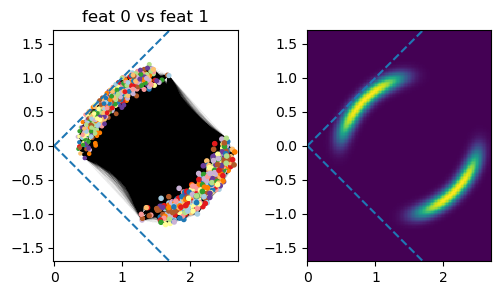

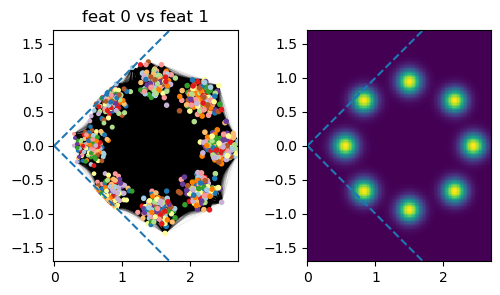

In [2]:

num_samples = 1000

#* two moons
graph_two_moons, dist_two_moons = sim.sample_normflows_dist(num_samples, 'TwoMoons', lorenz=True)

# #* circular gaussian mixture
graph_circ_gaus, dist_circ_gaus = sim.sample_normflows_dist(num_samples, 'Circ', lorenz=True)



_, axes_moons = plt.subplots(1, 2, figsize=(6, 3))
plot_2dgraph(graph_two_moons, lorenz_fig_lims=True, ax=axes_moons[0])
# plot_normflows_dist(dist_two_moons,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_moons[0])
plot_normflows_dist(dist_two_moons, lorenz=True, x_fig_lim=[0, 2.7], y_fig_lim=[-1.7,1.7], ax=axes_moons[1])

_, axes_circ = plt.subplots(1, 2, figsize=(6, 3))
plot_2dgraph(graph_circ_gaus, lorenz_fig_lims=True, ax=axes_circ[0])
# plot_normflows_dist(dist_circ_gaus,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_circ[0])
plot_normflows_dist(dist_circ_gaus,lorenz=True, x_fig_lim=[0, 2.7],y_fig_lim=[-1.7,1.7], ax=axes_circ[1])


# _, axes_chubs = plt.subplots(1, 2, figsize=(6, 3))
# plot_2dgraph(graph_two_chubs, lorenz_fig_lims=False, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[0])
# plot_normflows_dist(dist_two_chubs,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[0])
# plot_normflows_dist(dist_two_chubs,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[1])




### IECLAM



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of iegam on TwoMoons on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 0.05,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:368:::  
fit wrapper fit_feats, plotting state at iter 9999


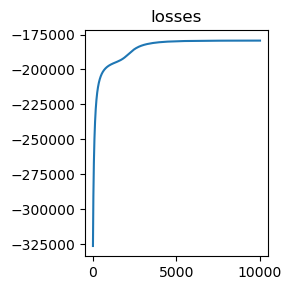

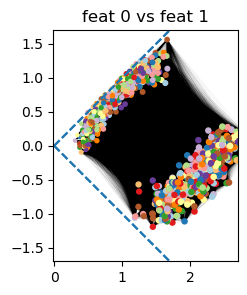

In [11]:
config_triplets = [ #* example how to change configs
#                     ['feat_opt', 'n_iter', 2000],
#                     ['feat_opt', 'lr', 0.00005],
#                     ['prior_opt', 'n_iter', 1500],
#                     ['prior_opt', 'lr', 0.0000005],
#                     ['prior_opt', 'noise_amp', 0.25],
#                     ['back_forth','n_back_forth', 50],
#                     ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]

trainer_iegam_twomoons = Trainer(
                model_name='iegam',
                task=None,
                device=device,
                dataset=graph_two_moons.clone()
)
# i want to optimize the trainer
losses_moons_ieclam, test_acc_moons_ieclam, val_acc_moons_ieclam = trainer_iegam_twomoons.train(
    init_feats=True,
    init_type='small_gaus',
    plot_every=-1,
    verbose=False
)

del trainer_iegam_twomoons.data

### PieClam

#### Two Moons



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of piegam on TwoMoons on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.0,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-05,
        "n_iter": 2000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 2000,
        "lr": 5e-05,
        "noise_amp": 0.25,
        "weight_decay": 0.01,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 5,
        "scheduler_step_size": 100,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:546:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user/Documents/danny

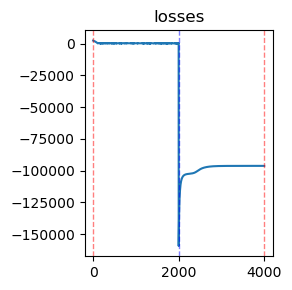

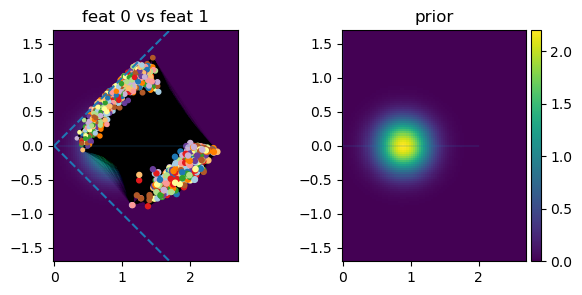



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 2/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:662:::  
fit, plotting state at iter 2.
dataset: TwoMoons, ,model: piegam


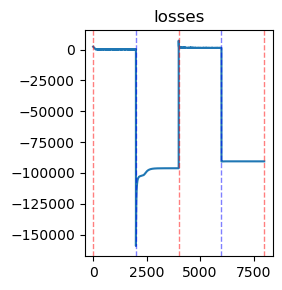

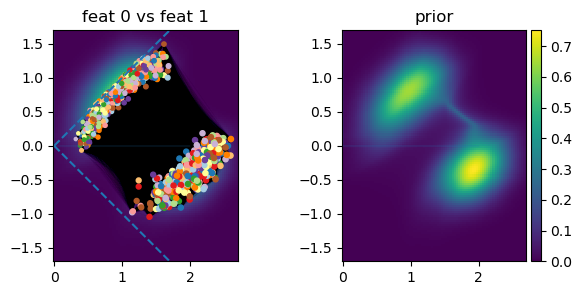



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 3/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:662:::  
fit, plotting state at iter 3.
dataset: TwoMoons, ,model: piegam


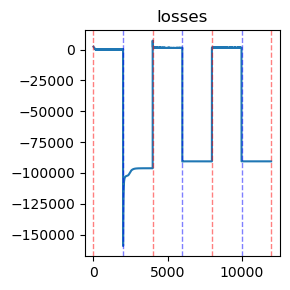

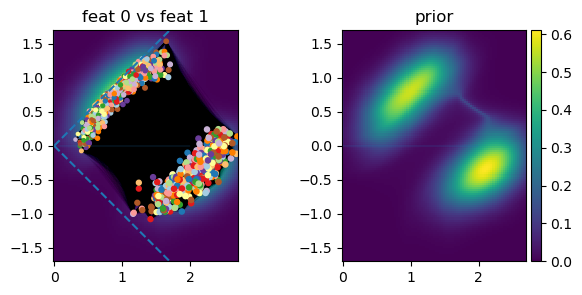



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 4/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:662:::  
fit, plotting state at iter 4.
dataset: TwoMoons, ,model: piegam


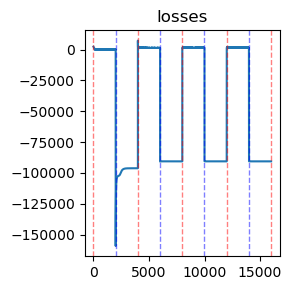

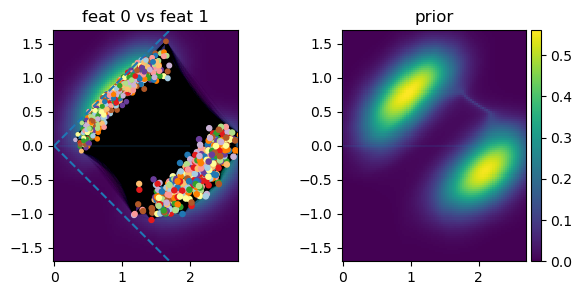



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 5/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:662:::  
fit, plotting state at iter 5.
dataset: TwoMoons, ,model: piegam


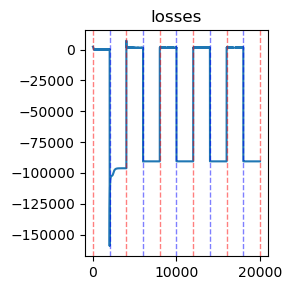

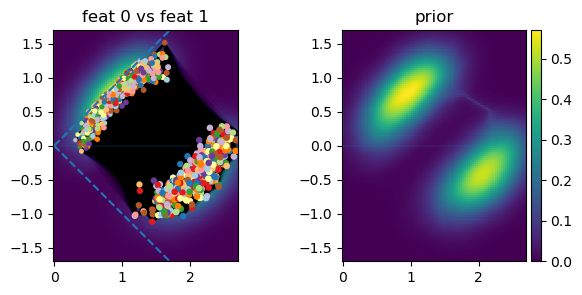



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:668:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:393:::  


FINISHED train model on params 





In [22]:
config_triplets = [ #* example how to change configs
                    # ['feat_opt', 'n_iter', 200],
                    # ['feat_opt', 'lr', 0.0005],
                    # ['prior_opt', 'n_iter', 150],
                    # ['prior_opt', 'lr', 0.00005],
                    # ['prior_opt', 'noise_amp', 0.25],
                    # ['back_forth','n_back_forth', 20],
                    # ['back_forth', 'first_func_in_fit', 'fit_feats']
                ]


trainer_pieclam_twomoons = Trainer(
                model_name='piegam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_two_moons.clone()
)
# i want to optimize the trainer
losses_pieclam_moons, test_acc_moons, val_acc_moons = trainer_pieclam_twomoons.train(
    plot_every=1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_pieclam_twomoons.data
del trainer_pieclam_twomoons.clamiter.prior


#### Circle



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of iegam on Circ on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 0.05,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:368:::  
fit wrapper fit_feats, plotting state at iter 9999


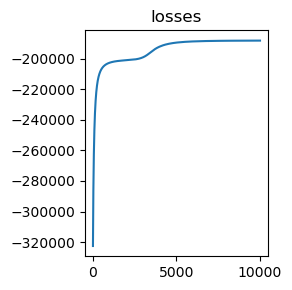

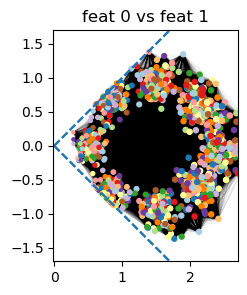

In [ ]:
config_triplets = [
#                     ['feat_opt', 'n_iter', 2000],
#                     ['feat_opt', 'lr', 0.00005],
#                     ['prior_opt', 'n_iter', 1500],
#                     ['prior_opt', 'lr', 0.0000005],
#                     ['prior_opt', 'noise_amp', 0.25],
#                     ['back_forth','n_back_forth', 50],
#                     ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]



trainer_iegam_circ = Trainer(
                model_name='iegam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_circ_gaus.clone()
)

losses_iegam_circ, acc_test_iegam_circ, acc_val_iegam_circ = trainer_iegam_circ.train(
    task_params={'d' : 0.2},
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_iegam_circ.data



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:301:::  
 starting optimization of piegam on Circ on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.0,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-05,
        "n_iter": 2000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 2000,
        "lr": 5e-05,
        "noise_amp": 0.25,
        "weight_decay": 0.01,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 5,
        "scheduler_step_size": 100,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:546:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user/Documents/danny/AAA

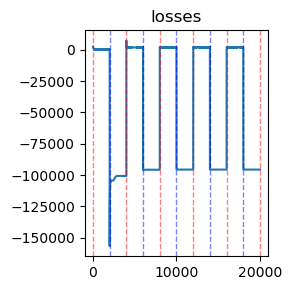

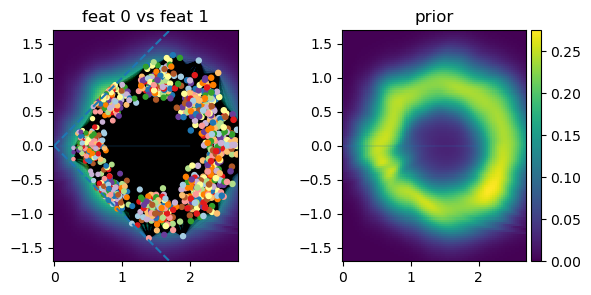



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:668:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:393:::  


FINISHED train model on params 





In [21]:
# CIRC
config_triplets = [
                    # ['feat_opt', 'n_iter', 200],
                    # ['feat_opt', 'lr', 0.00005],
                    # ['prior_opt', 'n_iter', 150],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['prior_opt', 'noise_amp', 0.1],
                    # ['back_forth','n_back_forth', 5],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]



trainer_piegam_circ = Trainer(
                model_name='piegam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_circ_gaus.clone()
)

losses_piegam_circ, acc_test_piegam_circ, acc_val_piegam_circ = trainer_piegam_circ.train(
    plot_every=5,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False
)

del trainer_piegam_circ.data
del trainer_piegam_circ.clamiter.prior
